In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Covonutional_neural_network.modelUttils.loaddataset import load_dataset 
from Covonutional_neural_network.modelUttils.augment_dataset import apply_combined_noise, add_gaussian_noise, add_label_noise

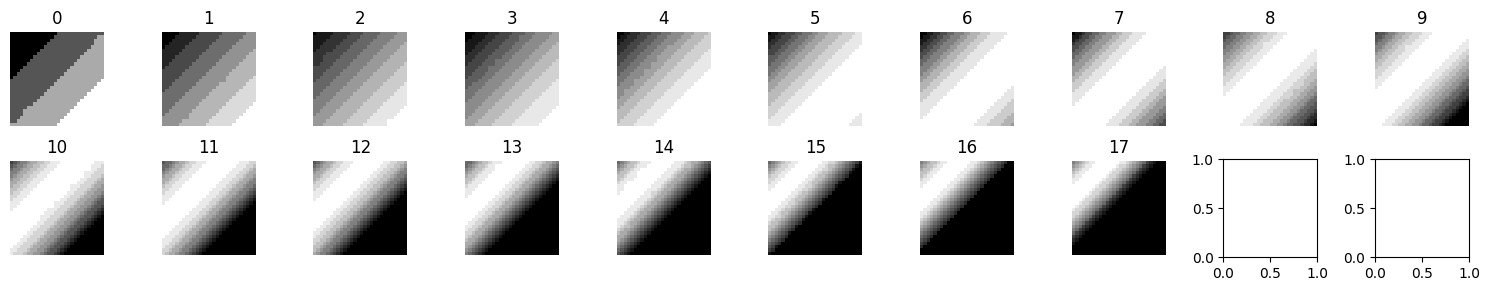

In [2]:
fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for label in range(18):
    sample = add_label_noise(np.zeros((28, 28)), label)
    axs[label//10][label%10].imshow(sample, cmap='gray')
    axs[label//10][label%10].set_title(str(label))
    axs[label//10][label%10].axis('off')
plt.tight_layout()
plt.show()


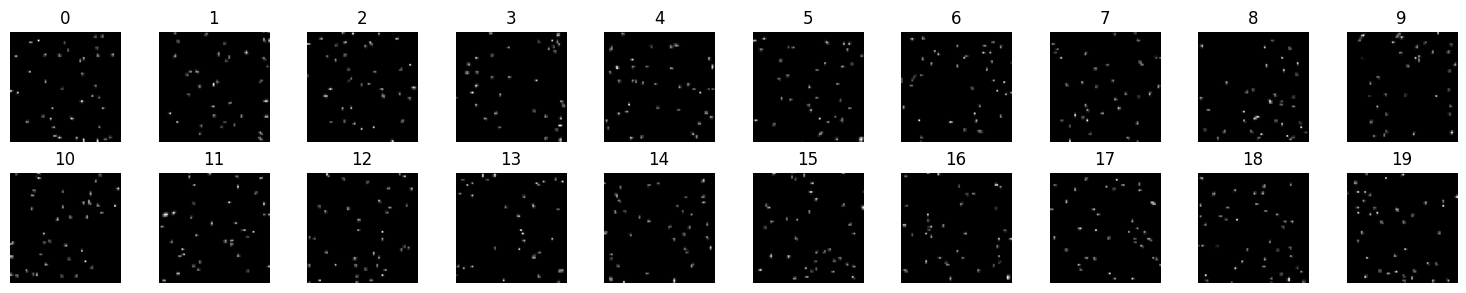

In [3]:
fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for label in range(20):
    sample = apply_combined_noise(np.zeros((64, 64)))
    axs[label//10][label%10].imshow(sample, cmap='gray')
    axs[label//10][label%10].set_title(str(label))
    axs[label//10][label%10].axis('off')
plt.tight_layout()
plt.show()


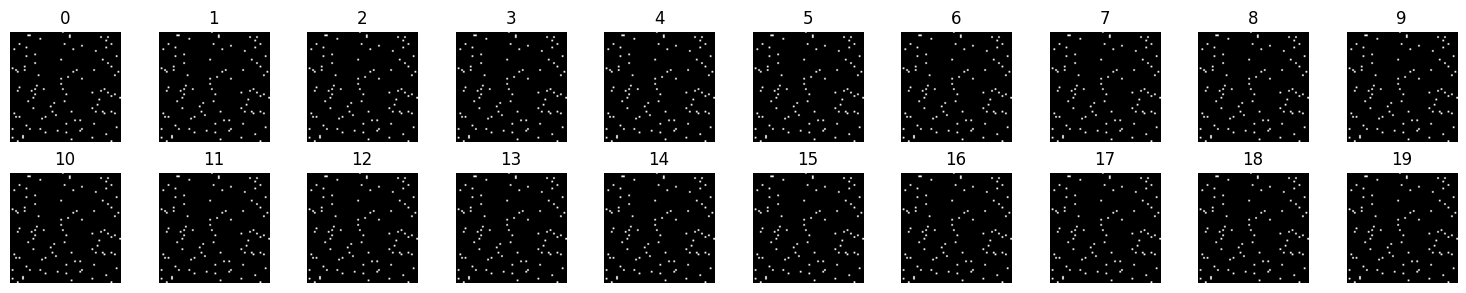

In [4]:
fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for label in range(20):
    sample = add_gaussian_noise(np.zeros((64, 64)), mean=0.0, std=0.002)
    axs[label//10][label%10].imshow(sample, cmap='gray')
    axs[label//10][label%10].set_title(str(label))
    axs[label//10][label%10].axis('off')
plt.tight_layout()
plt.show()


In [5]:
folder_paths = [
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 0",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 1",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 2",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 3",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 4",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 5",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 6",
]

In [6]:
X, y = load_dataset(folder_path=folder_paths)

Loading Dataset .............
Shape of imags are: torch.Size([23151, 1, 64, 64])
Total images lodded: 23151


Label 0: 4056 number of images
Label 1: 3711 number of images
Label 2: 3445 number of images
Label 3: 2403 number of images
Label 4: 3432 number of images
Label 5: 3445 number of images
Label 6: 2659 number of images
Label 7: 0 number of images
Label 8: 0 number of images
Label 9: 0 number of images
Label 10: 0 number of images
Label 11: 0 number of images
Label 12: 0 number of images
Label 13: 0 number of images
Label 14: 0 number of images
Label 15: 0 number of images
Label 16: 0 number of images
Label 17: 0 number of images
Label 18: 0 number of images
Label 19: 0 number of images


Dataset loaded successfully!


In [7]:
label_to_index = {
    '0': 0,
    '1': 1, 
    '2': 2, 
    '3': 3, 
    '4': 4, 
    '5': 5, 
    '6': 6, 
    '7': 7, 
    '8': 8, 
    '9': 9, 
    'add': 10,
    'dec': 11, 
    'div': 12, 
    'eq': 13, 
    'mul': 14,
    'sub': 15,
    '(': 16, 
    ')': 17, 
    'x': 18,  
    'y': 19, 
    'z': 20,
}

In [8]:
X.shape

torch.Size([23151, 1, 64, 64])

In [9]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

In [10]:
X = X.reshape(-1, 64*64)

Text(0.5, 1.0, 'Label: 0')

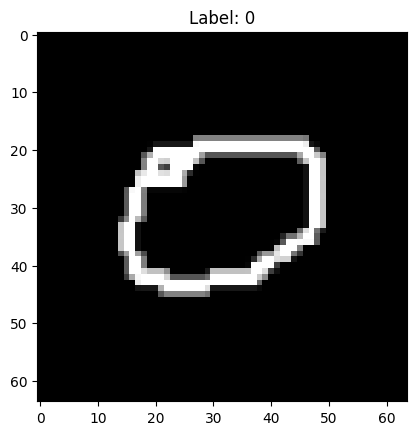

In [15]:
ind = np.random.randint(0, X.shape[0]-1)
plt.imshow(X[ind].reshape(64, 64), cmap='gray')
plt.title(f"Label: {y[ind]}")

c:\Users\visha\OneDrive\Desktop\MathAI\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


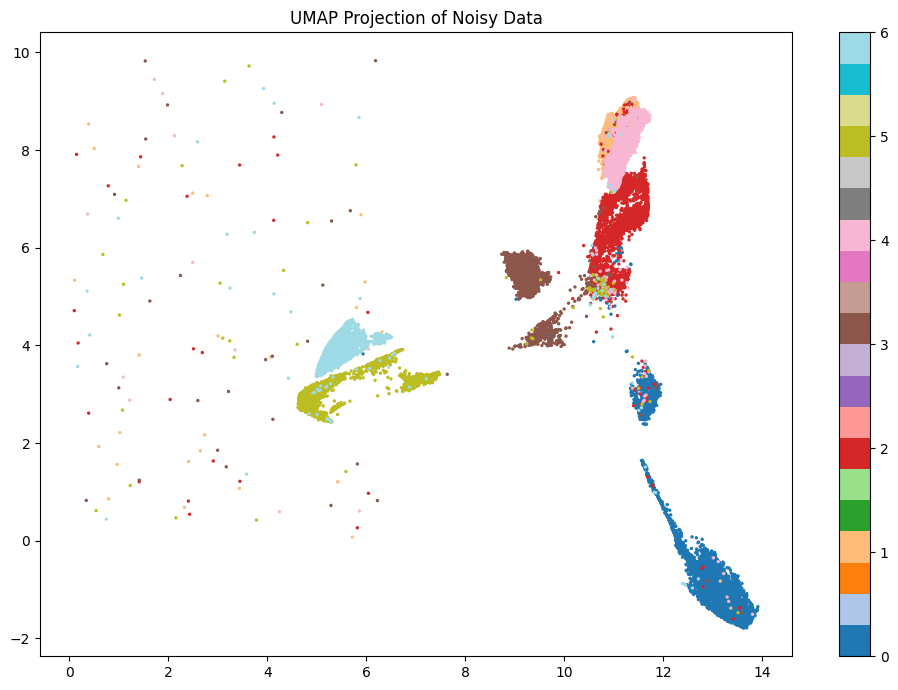

In [16]:
import umap.umap_ as umap
umap_model = umap.UMAP(n_components=64*64)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab20', s=2)
plt.title("UMAP Projection of Noisy Data")
plt.colorbar()
plt.tight_layout()
plt.show()

In [18]:
# Define a bounding box for the central region (adjust as needed)
x_min, x_max = 4, 10  # X-axis range for the central cluster
y_min, y_max = 2, 6   # Y-axis range for the central cluster

# Filter points in the central region
central_region = (X_umap[:, 0] >= x_min) & (X_umap[:, 0] <= x_max) & \
                 (X_umap[:, 1] >= y_min) & (X_umap[:, 1] <= y_max)

# Get the unique classes in the central region
overlapping_classes = np.unique(y[central_region])

print(f"Classes in the overlapping region: {overlapping_classes}")
print(f"Number of overlapping classes: {len(overlapping_classes)}")

Classes in the overlapping region: [0 1 2 3 4 5 6]
Number of overlapping classes: 7


In [ ]:
label_to_index = {
    '0': 0,
    '1': 1, 
    '2': 2, 
    '3': 3, 
    '4': 4, 
    '5': 5, 
    '6': 6, 
    '7': 7, 
    '8': 8, 
    '9': 9, 
    'add': 10,
    'dec': 11, 
    'div': 12, 
    'eq': 13, 
    'mul': 14,
    'sub': 15,
    '(': 16, 
    ')': 17, 
    'x': 18,  
    'y': 19, 
    'z': 20,
}

In [19]:
X -= X.mean(axis=0)
cov = X.T@X / X.shape[0]

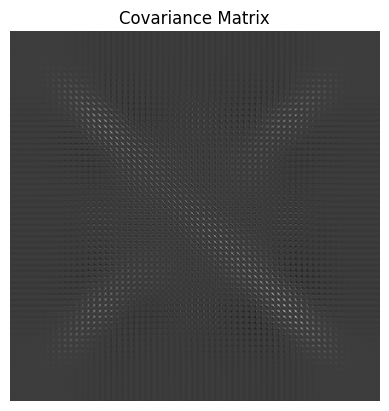

In [20]:
plt.imshow(cov,cmap='gray')
plt.title('Covariance Matrix')
plt.axis('off')
plt.show()

In [21]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
sorted_eigenvalues = np.argsort(eigenvalues)[::-1]

In [22]:
rule = np.cumsum(sorted_eigenvalues)/np.sum(sorted_eigenvalues)
rule = rule[rule>0.95]
rule

array([0.95006689, 0.95048721, 0.9509074 , 0.95132653, 0.95174553,
       0.95216442, 0.95258318, 0.95300183, 0.95342035, 0.95383876,
       0.95425705, 0.95467522, 0.95509327, 0.9555112 , 0.95592901,
       0.9563467 , 0.95676428, 0.95718173, 0.95759906, 0.95801628,
       0.95843337, 0.95885035, 0.95926709, 0.95968395, 0.96010057,
       0.96051707, 0.96093345, 0.96134971, 0.96176585, 0.96218187,
       0.96259778, 0.96300605, 0.96341444, 0.96382259, 0.96423063,
       0.96463854, 0.96504634, 0.96545401, 0.96586157, 0.96626901,
       0.96667632, 0.96708352, 0.9674906 , 0.96789756, 0.96830441,
       0.96871113, 0.96911773, 0.96952421, 0.96993058, 0.97033682,
       0.97074295, 0.97114896, 0.97155484, 0.97196061, 0.97236626,
       0.97277179, 0.9731772 , 0.97358237, 0.97398743, 0.97439212,
       0.9747961 , 0.97519996, 0.97560323, 0.97600601, 0.97640868,
       0.97681123, 0.97721354, 0.97761573, 0.9780178 , 0.97841976,
       0.97881933, 0.97921877, 0.97961786, 0.98001684, 0.98041

In [23]:
W = eigenvectors[:, :len(eigenvectors) - len(rule)]
# W = eigenvectors
W.shape

torch.Size([4096, 3971])

In [25]:
new_X = W.T @ X.T

RuntimeError: expected m1 and m2 to have the same dtype, but got: struct c10::complex<float> != float

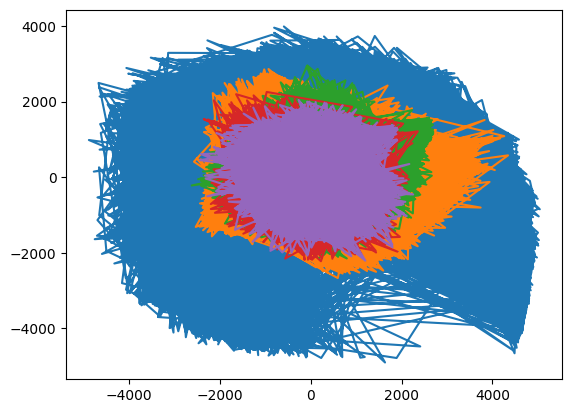

In [ ]:
plt.plot(new_X[0], new_X[1], new_X[2], new_X[3], new_X[4], new_X[5], new_X[6], new_X[7], new_X[8], new_X[9])
